In [ ]:
UNAD
John Sebastian Escobar Uchima
Predecir la enfermedad cardiaca Regresión loguística

In [ ]:
Pasos de la Actividad

1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo.
5. Entrenar el modelo configurando los diferentes
hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.
9. Crear una cuenta en GitHub y cargar los códigos de los modelos
diseñados https://github.com/

In [ ]:
1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.

In [20]:
#Cargar las librerias requeridas

import pandas as pd # Manejor y análisis de estructura de datos
import numpy as np # Calculo numérico y el análisis de datos
import seaborn as sns # Creación graficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en 2 dimensiones

#Librerias para implementar modelos de ciencia de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [5]:
#Lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('D:/Tareas/7 semestre/Analisis de datos/archive (1)/heart_cleveland_upload.csv')

In [3]:
#Realizamos lestura de los datos para el analisis exploratorio

Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
#Descripción de los datos

Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

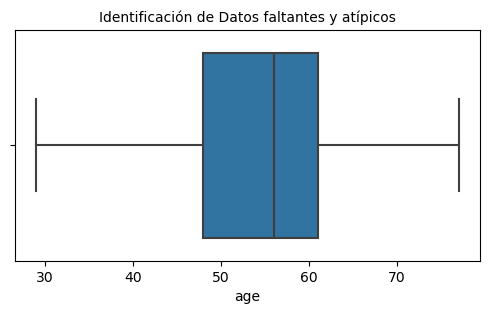

In [5]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['age'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

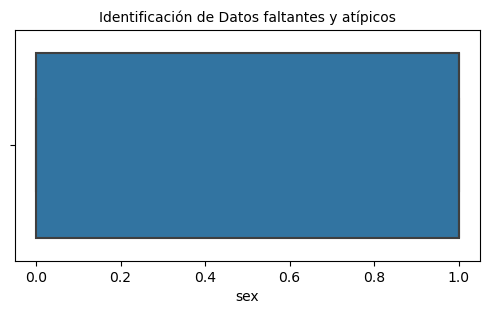

In [6]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['sex'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

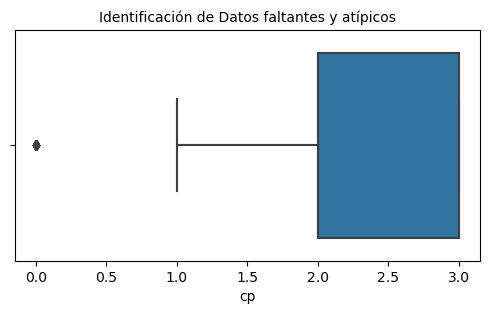

In [7]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

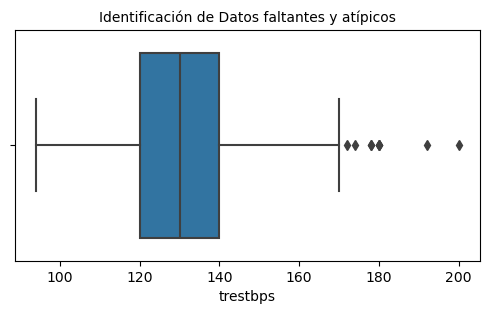

In [8]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

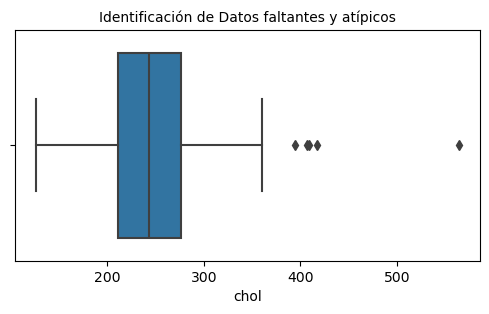

In [9]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

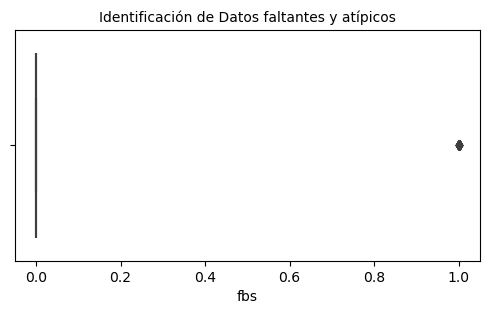

In [10]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['fbs'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

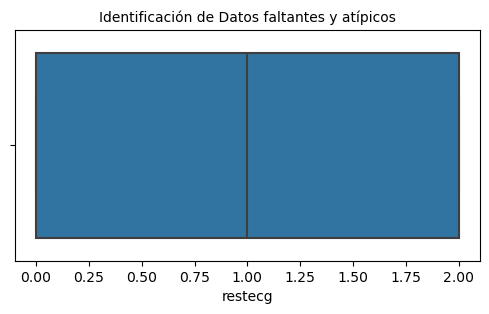

In [11]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['restecg'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

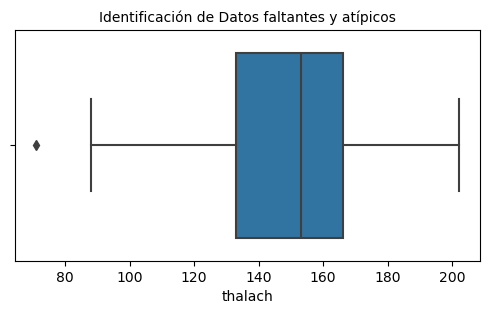

In [12]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

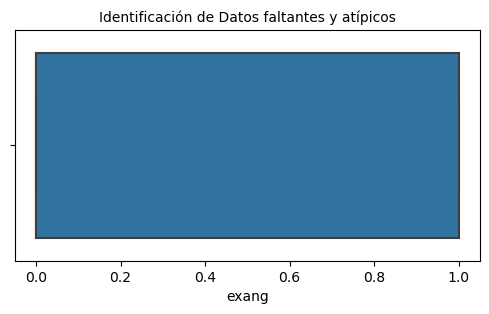

In [13]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['exang'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

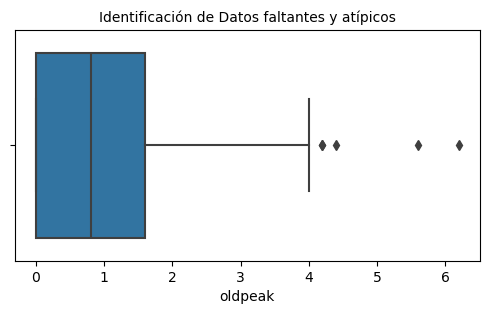

In [14]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

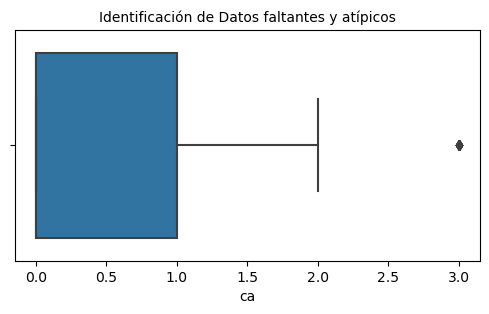

In [62]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['ca'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

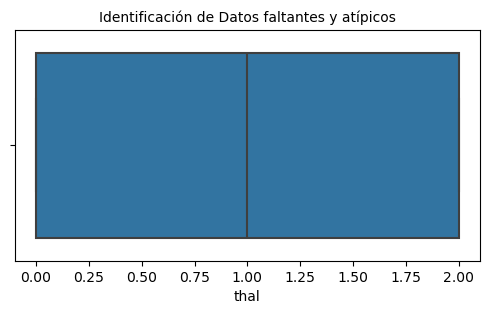

In [61]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['thal'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

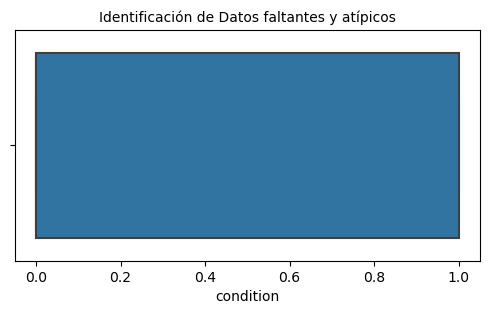

In [18]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['condition'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [ ]:
2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.

In [20]:
#Revisión de datos faltantes

print("Cantidad de registros con cero en age: ", Datos['age'].isin([0]).sum())
print("Cantidad de registros con cero en trestbps: ", Datos['trestbps'].isin([0]).sum())
print("Cantidad de registros con cero en chol: ", Datos['chol'].isin([0]).sum())
print("Cantidad de registros con cero en thalach: ", Datos['thalach'].isin([0]).sum())
print("Cantidad de registros con cero en oldpeak: ", Datos['oldpeak'].isin([0]).sum())

Cantidad de registros con cero en age:  0
Cantidad de registros con cero en trestbps:  0
Cantidad de registros con cero en chol:  0
Cantidad de registros con cero en thalach:  0
Cantidad de registros con cero en oldpeak:  96


In [21]:
#Reemplazar todos los 0 con el valor medio (promedio) de la columna

Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())

In [22]:
#Comprobación si se cambiaron los datos faltantes

print("Cantidad de registros con cero en oldpeak: ", Datos['oldpeak'].isin([0]).sum())

Cantidad de registros con cero en oldpeak:  0


Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

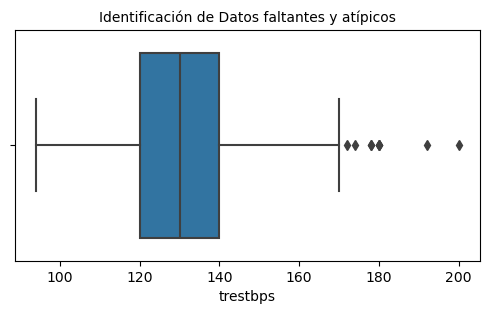

In [16]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [34]:
#Conteo de datos atípicos

nivel_maximo=170
nivel_minimo=90
Total_Atípicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("el total de datos atípicos es {}".format(Total_Atípicos))

el total de datos atípicos es 2


In [35]:
#Filtra datos atípicos
Datos=Datos[(Datos['trestbps']<nivel_maximo)&(Datos['trestbps']>nivel_minimo)]

In [36]:
#Validamos si se removieron los datos atípicos

Total_Atípicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("el total de datos atípicos es {}".format(Total_Atípicos))

el total de datos atípicos es 0


Text(0.5, 1.0, 'Comprobación de eliminación de valores atípicos')

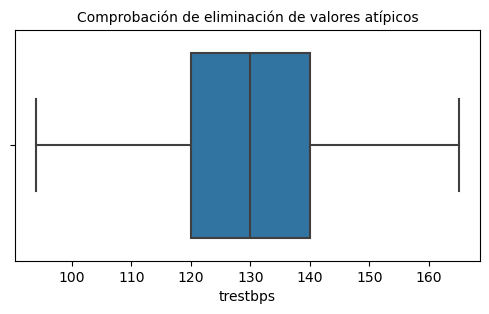

In [37]:
#Comprobación de eliminación de valores atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Comprobación de eliminación de valores atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

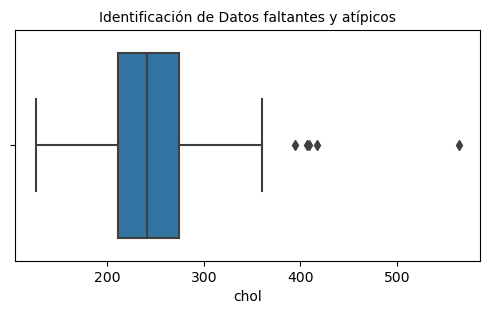

In [38]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [46]:
#Conteo de datos atípicos

nivel_maximo=390
nivel_minimo=90
Total_Atípicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("el total de datos atípicos es {}".format(Total_Atípicos))

el total de datos atípicos es 1


In [47]:
#Filtra datos atípicos
Datos=Datos[(Datos['chol']<nivel_maximo)&(Datos['chol']>nivel_minimo)]

In [50]:
#Validamos si se removieron los datos atípicos

Total_Atípicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("el total de datos atípicos es {}".format(Total_Atípicos))

el total de datos atípicos es 0


Text(0.5, 1.0, 'Comprobación de eliminación de valores atípicos')

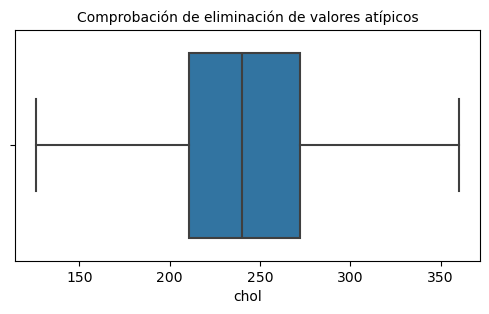

In [49]:
#Comprobación de eliminación de valores atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['chol'])
plt.title('Comprobación de eliminación de valores atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

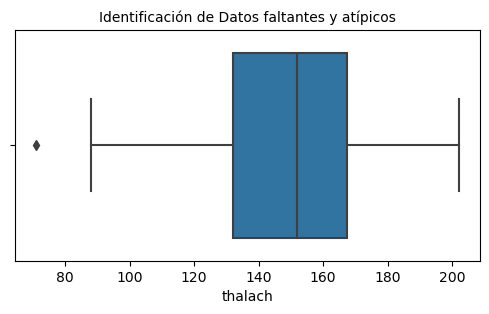

In [51]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [52]:
#Conteo de datos atípicos

nivel_maximo=220
nivel_minimo=80
Total_Atípicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("el total de datos atípicos es {}".format(Total_Atípicos))

el total de datos atípicos es 1


In [53]:
#Filtra datos atípicos
Datos=Datos[(Datos['thalach']<nivel_maximo)&(Datos['thalach']>nivel_minimo)]

In [54]:
#Validamos si se removieron los datos atípicos

Total_Atípicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("el total de datos atípicos es {}".format(Total_Atípicos))

el total de datos atípicos es 0


Text(0.5, 1.0, 'Comprobación de eliminación de valores atípicos')

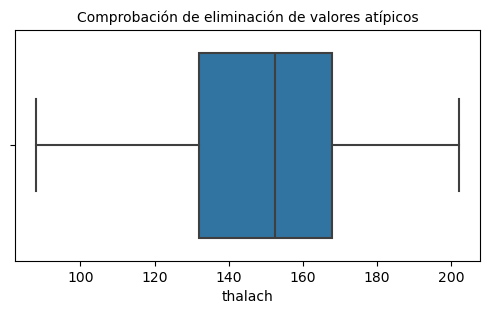

In [55]:
#Comprobación de eliminación de valores atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['thalach'])
plt.title('Comprobación de eliminación de valores atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

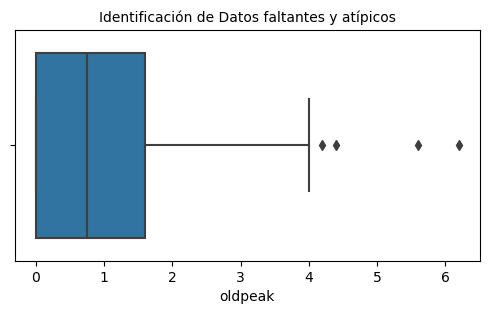

In [56]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [57]:
#Conteo de datos atípicos

nivel_maximo=4
nivel_minimo=0
Total_Atípicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("el total de datos atípicos es {}".format(Total_Atípicos))

el total de datos atípicos es 4


In [58]:
#Filtra datos atípicos
Datos=Datos[(Datos['oldpeak']<nivel_maximo)&(Datos['oldpeak']>nivel_minimo)]

In [59]:
#Validamos si se removieron los datos atípicos

Total_Atípicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("el total de datos atípicos es {}".format(Total_Atípicos))

el total de datos atípicos es 0


Text(0.5, 1.0, 'Comprobación de eliminación de valores atípicos')

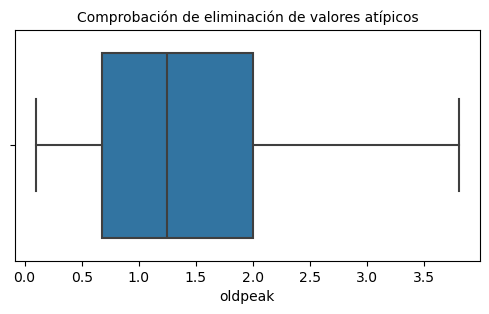

In [60]:
#Comprobación de eliminación de valores atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Comprobación de eliminación de valores atípicos', fontsize=10)

In [63]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 295
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        180 non-null    int64  
 1   sex        180 non-null    int64  
 2   cp         180 non-null    int64  
 3   trestbps   180 non-null    int64  
 4   chol       180 non-null    int64  
 5   fbs        180 non-null    int64  
 6   restecg    180 non-null    int64  
 7   thalach    180 non-null    int64  
 8   exang      180 non-null    int64  
 9   oldpeak    180 non-null    float64
 10  slope      180 non-null    int64  
 11  ca         180 non-null    int64  
 12  thal       180 non-null    int64  
 13  condition  180 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 21.1 KB


In [ ]:
3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.

    Caracteristica de interes:

Condition: Si la persona tiene enfermedad cardíaca (0 = sin enfermedad, 1 = enfermedad )

In [64]:
#Total de personas con enfermedad cardíaca

Datos['condition'].value_counts()

condition
1    96
0    84
Name: count, dtype: int64

In [65]:
Datos[['condition']].head(50)

,condition
0,0
1,0
2,0
3,1
4,0
6,0
7,1
8,0
12,1
13,0


In [ ]:
4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo.

In [7]:
#Porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) = 25%

#Crear variables X y Y para almacenar la información del entrenamiento

X=Datos.drop('condition',axis=1) #Se cargan los datos de train sin los datos de la columna condition
Y=Datos['condition']#Se cargan los datos de train con los datos de la columna condition

#Usamos la función train_test_split que nos permite realizar la división de un conjunto de datos

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [68]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
80    67    1   2       152   212    0        2      150      0      0.8   
107   54    1   2       125   273    0        2      152      0      0.5   
96    59    1   2       126   218    1        0      134      0      2.2   
251   53    0   3       130   264    0        2      143      0      0.4   
183   63    1   3       130   330    1        2      132      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
129   49    1   2       118   149    0        2      126      0      0.8   
78    68    1   2       118   277    0        0      151      0      1.0   
170   65    0   3       150   225    0        2      114      0      1.0   
252   53    1   3       123   282    0        0       95      1      2.0   
21    38    1   0       120   231    0        0      182      1      3.8   

     slope  ca  thal  
80       1   0     2  
107      2   1     0  
96       1   1    

In [69]:
print (Y_train)

80     1
107    0
96     1
251    0
183    1
      ..
129    1
78     0
170    1
252    1
21     1
Name: condition, Length: 135, dtype: int64


In [ ]:
5. Entrenar el modelo configurando los diferentes
hiperparámetros.

In [14]:
#Construir el modelo de regresión logística

model_logistic_regression=LogisticRegression(solver="liblinear") #liblinear es una libreria para resolver problemas lineales de clasificación y regresión
model_logistic_regression.fit(X_train, Y_train)

#Creamos el modelo de predicción

Prediccion=model_logistic_regression.predict(X_test) #La función predict predice los valores a partir del conjunto de datos

In [10]:
print (Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [12]:
print(Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [ ]:
6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.

In [15]:
#Desempeño del modelo de regresión

print(classification_report(Y_test, Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



In [ ]:
7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo.

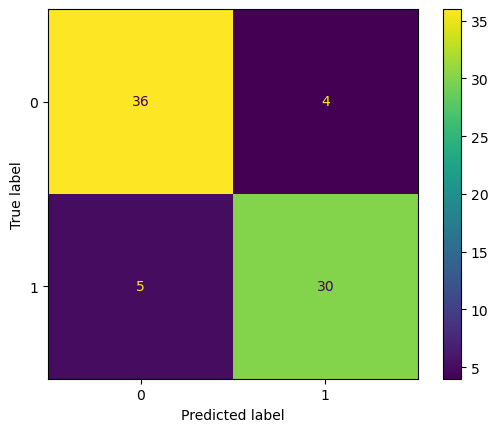

In [19]:
#Matriz de confusión del modelo

cm=confusion_matrix(Y_test, Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

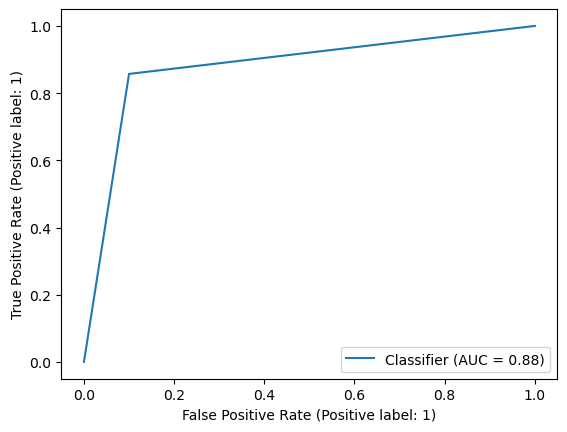

In [21]:
#Curva de precisión del modelo

RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()